In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers
import os

In [2]:
data_dir = ' data/'

In [3]:
data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_dataset = data.flow_from_directory("data/", target_size=(256, 256),  class_mode="sparse")
# sparse is used when categorical classification  ( binary is used with binary classification )
test_dataset = data.flow_from_directory("test/", target_size=(256, 256), class_mode="sparse")

Found 1255 images belonging to 11 classes.
Found 415 images belonging to 11 classes.


In [4]:
cnn = models.Sequential([
    layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(75, activation='relu'),
    layers.Dense(11, activation='softmax') # 6 is number of classes ( must be changes )
])

In [5]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(train_dataset, epochs=8)

Epoch 1/8
40/40 [==============================] - 201s 5s/step - loss: 5.1219 - accuracy: 0.3291
Epoch 2/8
40/40 [==============================] - 195s 5s/step - loss: 1.6631 - accuracy: 0.4175
Epoch 3/8
40/40 [==============================] - 176s 4s/step - loss: 1.4142 - accuracy: 0.5187
Epoch 4/8
40/40 [==============================] - 189s 5s/step - loss: 1.0710 - accuracy: 0.6518
Epoch 5/8
40/40 [==============================] - 177s 4s/step - loss: 0.5658 - accuracy: 0.8239
Epoch 6/8
40/40 [==============================] - 185s 5s/step - loss: 0.2292 - accuracy: 0.9434
Epoch 7/8
40/40 [==============================] - 182s 5s/step - loss: 0.1006 - accuracy: 0.9689
Epoch 8/8
40/40 [==============================] - 178s 4s/step - loss: 0.0368 - accuracy: 0.9928


In [7]:
cnn.evaluate(test_dataset)

13/13 [==============================] - 54s 4s/step - loss: 0.5271 - accuracy: 0.9060


[0.5270751118659973, 0.9060240983963013]

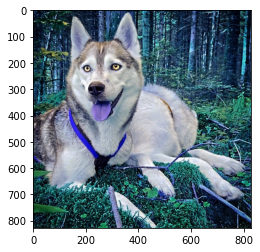

In [8]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('data/dog/2021-09-26_16-03-36_UTC.jpg') 
plt.imshow(img)

In [9]:
import cv2
image = cv2.imread("data/dog/2021-09-26_16-03-36_UTC.jpg")
res = cv2.resize(image, (256, 256), cv2.INTER_CUBIC )
res = np.expand_dims(res, 0)
x = cnn.predict(res)
print (x)
print(np.argmax(x, -1))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


In [12]:
images = []
folder = "testing/"
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
        images.append(img)

In [13]:
len(images)

97

In [14]:
images[0].shape

(1080, 1080, 3)

In [15]:
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (256, 256), cv2.INTER_CUBIC )

In [16]:
images[0].shape

(256, 256, 3)

In [17]:
predictions = [ ]
for image in images:
    imagedata = np.expand_dims(image, 0)
    x = cnn.predict(imagedata)
    predictions.append(np.argmax(x, -1))

In [18]:
print(predictions)

[array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64),

In [20]:
predictions[95]

array([8], dtype=int64)

In [21]:
# save model
cnn.save('predictionModel')
print ('saved')

INFO:tensorflow:Assets written to: predictionModel\assets
saved


In [22]:
from keras.models import load_model

In [23]:
# load model
model = load_model('predictionModel')

In [26]:
imag = cv2.imread("testing/2021-09-26_19-07-01_UTC.jpg")
res = cv2.resize(imag, (256, 256), cv2.INTER_CUBIC )
res = np.expand_dims(res, 0)
v = model.predict(res)
print (v)
print(np.argmax(v, -1))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]
